## Part 1 - Exploratory Data Analysis

In this notebook we will be conducting an EDA of the Lending Club Dataset with data from 2007 - 2019. The dataset can be found [here](https://www.kaggle.com/wendykan/lending-club-loan-data) on Kaggle. 

#### Goals


In [1]:
#importing the holy trinity of data science plugins
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt 

#other visualzation packages
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/andrewberry/Downloads/lending-club-loan-data/loan.csv', low_memory=False)

In [5]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [6]:
df.shape

(2260668, 145)

145 features & 2 million plus rows. Wow! Probably best we start by understanding what these features, so we can start by asking the right questions? 



#### Data Dictionary
| BrowseNotesFile                      | Description                                                                                                                                                                                                        |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| acceptD                              | The date which the borrower accepted  the offer                                                                                                                                                                    |
| accNowDelinq                         | The number of accounts on which the borrower is now delinquent.                                                                                                                                                    |
| accOpenPast24Mths                    | Number of trades opened in past 24 months.                                                                                                                                                                         |
| addrState                            | The state provided by the borrower in the loan application                                                                                                                                                         |
| all_util                             | Balance to credit limit on all trades                                                                                                                                                                              |
| annual_inc_joint                     | The combined self-reported annual income provided by the co-borrowers during registration                                                                                                                          |
| annualInc                            | The self-reported annual income provided by the borrower during registration.                                                                                                                                      |
| application_type                     | Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                               |
| avg_cur_bal                          | Average current balance of all accounts                                                                                                                                                                            |
| bcOpenToBuy                          | Total open to buy on revolving bankcards.                                                                                                                                                                          |
| bcUtil                               | Ratio of total current balance to high credit/credit limit for all bankcard accounts.                                                                                                                              |
| chargeoff_within_12_mths             | Number of charge-offs within 12 months                                                                                                                                                                             |
| collections_12_mths_ex_med           | Number of collections in 12 months excluding medical collections                                                                                                                                                   |
| creditPullD                          | The date LC pulled credit for this loan                                                                                                                                                                            |
| delinq2Yrs                           | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                                                                                       |
| delinqAmnt                           | The past-due amount owed for the accounts on which the borrower is now delinquent.                                                                                                                                 |
| desc                                 | Loan description provided by the borrower                                                                                                                                                                          |
| dti                                  | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.           |
| dti_joint                            | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income |
| earliestCrLine                       | The date the borrower's earliest reported credit line was opened                                                                                                                                                   |
| effective_int_rate                   | The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off.                                                  |
| emp_title                            | The job title supplied by the Borrower when applying for the loan.*                                                                                                                                                |
| empLength                            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                                  |
| expD                                 | The date the listing will expire                                                                                                                                                                                   |
| expDefaultRate                       | The expected default rate of the loan.                                                                                                                                                                             |
| ficoRangeHigh                        | The upper boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                       |
| ficoRangeLow                         | The lower boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                       |
| fundedAmnt                           | The total amount committed to that loan at that point in time.                                                                                                                                                     |
| grade                                | LC assigned loan grade                                                                                                                                                                                             |
| homeOwnership                        | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.                                                                                                |
| id                                   | A unique LC assigned ID for the loan listing.                                                                                                                                                                      |
| il_util                              | Ratio of total current balance to high credit/credit limit on all install acct                                                                                                                                     |
| ils_exp_d                            | wholeloan platform expiration date                                                                                                                                                                                 |
| initialListStatus                    | The initial listing status of the loan. Possible values are – W, F                                                                                                                                                 |
| inq_fi                               | Number of personal finance inquiries                                                                                                                                                                               |
| inq_last_12m                         | Number of credit inquiries in past 12 months                                                                                                                                                                       |
| inqLast6Mths                         | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                                   |
| installment                          | The monthly payment owed by the borrower if the loan originates.                                                                                                                                                   |
| intRate                              | Interest Rate on the loan                                                                                                                                                                                          |
| isIncV                               | Indicates if income was verified by LC, not verified, or if the income source was verified                                                                                                                         |
| listD                                | The date which the borrower's application was listed on the platform.                                                                                                                                              |
| loanAmnt                             | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                                       |
| max_bal_bc                           | Maximum current balance owed on all revolving accounts                                                                                                                                                             |
| memberId                             | A unique LC assigned Id for the borrower member.                                                                                                                                                                   |
| mo_sin_old_rev_tl_op                 | Months since oldest revolving account opened                                                                                                                                                                       |
| mo_sin_rcnt_rev_tl_op                | Months since most recent revolving account opened                                                                                                                                                                  |
| mo_sin_rcnt_tl                       | Months since most recent account opened                                                                                                                                                                            |
| mortAcc                              | Number of mortgage accounts.                                                                                                                                                                                       |
| msa                                  | Metropolitan Statistical Area of the borrower.                                                                                                                                                                     |
| mths_since_last_major_derog          | Months since most recent 90-day or worse rating                                                                                                                                                                    |
| mths_since_oldest_il_open            | Months since oldest bank installment account opened                                                                                                                                                                |
| mths_since_rcnt_il                   | Months since most recent installment accounts opened                                                                                                                                                               |
| mthsSinceLastDelinq                  | The number of months since the borrower's last delinquency.                                                                                                                                                        |
| mthsSinceLastRecord                  | The number of months since the last public record.                                                                                                                                                                 |
| mthsSinceMostRecentInq               | Months since most recent inquiry.                                                                                                                                                                                  |
| mthsSinceRecentBc                    | Months since most recent bankcard account opened.                                                                                                                                                                  |
| mthsSinceRecentLoanDelinq            | Months since most recent personal finance delinquency.                                                                                                                                                             |
| mthsSinceRecentRevolDelinq           | Months since most recent revolving delinquency.                                                                                                                                                                    |
| num_accts_ever_120_pd                | Number of accounts ever 120 or more days past due                                                                                                                                                                  |
| num_actv_bc_tl                       | Number of currently active bankcard accounts                                                                                                                                                                       |
| num_actv_rev_tl                      | Number of currently active revolving trades                                                                                                                                                                        |
| num_bc_sats                          | Number of satisfactory bankcard accounts                                                                                                                                                                           |
| num_bc_tl                            | Number of bankcard accounts                                                                                                                                                                                        |
| num_il_tl                            | Number of installment accounts                                                                                                                                                                                     |
| num_op_rev_tl                        | Number of open revolving accounts                                                                                                                                                                                  |
| num_rev_accts                        | Number of revolving accounts                                                                                                                                                                                       |
| num_rev_tl_bal_gt_0                  | Number of revolving trades with balance >0                                                                                                                                                                         |
| num_sats                             | Number of satisfactory accounts                                                                                                                                                                                    |
| num_tl_120dpd_2m                     | Number of accounts currently 120 days past due (updated in past 2 months)                                                                                                                                          |
| num_tl_30dpd                         | Number of accounts currently 30 days past due (updated in past 2 months)                                                                                                                                           |
| num_tl_90g_dpd_24m                   | Number of accounts 90 or more days past due in last 24 months                                                                                                                                                      |
| num_tl_op_past_12m                   | Number of accounts opened in past 12 months                                                                                                                                                                        |
| open_acc_6m                          | Number of open trades in last 6 months                                                                                                                                                                             |
| open_il_12m                          | Number of installment accounts opened in past 12 months                                                                                                                                                            |
| open_il_24m                          | Number of installment accounts opened in past 24 months                                                                                                                                                            |
| open_act_il                          | Number of currently active installment trades                                                                                                                                                                      |
| open_rv_12m                          | Number of revolving trades opened in past 12 months                                                                                                                                                                |
| open_rv_24m                          | Number of revolving trades opened in past 24 months                                                                                                                                                                |
| openAcc                              | The number of open credit lines in the borrower's credit file.                                                                                                                                                     |
| pct_tl_nvr_dlq                       | Percent of trades never delinquent                                                                                                                                                                                 |
| percentBcGt75                        | Percentage of all bankcard accounts > 75% of limit.                                                                                                                                                                |
| pub_rec_bankruptcies                 | Number of public record bankruptcies                                                                                                                                                                               |
| pubRec                               | Number of derogatory public records                                                                                                                                                                                |
| purpose                              | A category provided by the borrower for the loan request.                                                                                                                                                          |
| reviewStatus                         | The status of the loan during the listing period. Values: APPROVED, NOT_APPROVED.                                                                                                                                  |
| reviewStatusD                        | The date the loan application was reviewed by LC                                                                                                                                                                   |
| revolBal                             | Total credit revolving balance                                                                                                                                                                                     |
| revolUtil                            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                                         |
| serviceFeeRate                       | Service fee rate paid by the investor for this loan.                                                                                                                                                               |
| subGrade                             | LC assigned loan subgrade                                                                                                                                                                                          |
| tax_liens                            | Number of tax liens                                                                                                                                                                                                |
| term                                 | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                                                               |
| title                                | The loan title provided by the borrower                                                                                                                                                                            |
| tot_coll_amt                         | Total collection amounts ever owed                                                                                                                                                                                 |
| tot_cur_bal                          | Total current balance of all accounts                                                                                                                                                                              |
| tot_hi_cred_lim                      | Total high credit/credit limit                                                                                                                                                                                     |
| total_bal_il                         | Total current balance of all installment accounts                                                                                                                                                                  |
| total_cu_tl                          | Number of finance trades                                                                                                                                                                                           |
| total_il_high_credit_limit           | Total installment high credit/credit limit                                                                                                                                                                         |
| total_rev_hi_lim                     | Total revolving high credit/credit limit                                                                                                                                                                           |
| totalAcc                             | The total number of credit lines currently in the borrower's credit file                                                                                                                                           |
| totalBalExMort                       | Total credit balance excluding mortgage                                                                                                                                                                            |
| totalBcLimit                         | Total bankcard high credit/credit limit                                                                                                                                                                            |
| url                                  | URL for the LC page with listing data.                                                                                                                                                                             |
| verified_status_joint                | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified                                                                                                 |
| zip_code                             | The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                              |
| revol_bal_joint                      |  Sum of revolving credit balance of the co-borrowers, net of duplicate balances                                                                                                                                    |
| sec_app_fico_range_low               |  FICO range (high) for the secondary applicant                                                                                                                                                                     |
| sec_app_fico_range_high              |  FICO range (low) for the secondary applicant                                                                                                                                                                      |
| sec_app_earliest_cr_line             |  Earliest credit line at time of application for the secondary applicant                                                                                                                                           |
| sec_app_inq_last_6mths               |  Credit inquiries in the last 6 months at time of application for the secondary applicant                                                                                                                          |
| sec_app_mort_acc                     |  Number of mortgage accounts at time of application for the secondary applicant                                                                                                                                    |
| sec_app_open_acc                     |  Number of open trades at time of application for the secondary applicant                                                                                                                                          |
| sec_app_revol_util                   |  Ratio of total current balance to high credit/credit limit for all revolving accounts                                                                                                                             |
| sec_app_open_act_il                  |  Number of currently active installment trades at time of application for the secondary applicant                                                                                                                  |
| sec_app_num_rev_accts                |  Number of revolving accounts at time of application for the secondary applicant                                                                                                                                   |
| sec_app_chargeoff_within_12_mths     |  Number of charge-offs within last 12 months at time of application for the secondary applicant                                                                                                                    |
| sec_app_collections_12_mths_ex_med   |  Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant                                                                                      |
| sec_app_mths_since_last_major_derog  |  Months since most recent 90-day or worse rating at time of application for the secondary applicant                                                                                                                |
| disbursement_method                  | The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY                                                                                                                        |

That's a lot of features for me to explore in this dataset. I don't even understand some of them, I'm not a finance professional so I'm going to just pick a few questions and features that I would like to explore. 

#### Most Interesting Features: (In My Opinion)
**Potential Target Features**
- expDefaultRate (regression)
- int_rate 
- loan_status
- purpose (classification)
- grade (classification)
- issue_d

#### Interesting Questions to ask? 
Since we have time series data, it would be interesting to look at various features changes over the years. There is a lot we can ask and look around with this dataset. How exciting? 
- What is the default rate change over the years? 
- What is considered bad debt vs good debt? 
- What are the leading lending club loans?

#### Interesting Machine Learning Problems? 
- Can I predict the default rate?
- Can I accuractley classify the loan grade loan_status based on the available metrics? 


Before we continue, let's quickly check each feature to see which ones has the highest amount of missing data and delete them. It will be easier for us to analyze the data later. 

In [7]:
#Check percentage of data missing for each feature/column
round(df.isna().sum()/len(df),3)

id                                            1.000
member_id                                     1.000
loan_amnt                                     0.000
funded_amnt                                   0.000
funded_amnt_inv                               0.000
term                                          0.000
int_rate                                      0.000
installment                                   0.000
grade                                         0.000
sub_grade                                     0.000
emp_title                                     0.074
emp_length                                    0.065
home_ownership                                0.000
annual_inc                                    0.000
verification_status                           0.000
issue_d                                       0.000
loan_status                                   0.000
pymnt_plan                                    0.000
url                                           1.000
desc        

I will drop columns with 30% or more missing data. 

In [8]:
df.dropna(thresh = 0.7*(len(df)), axis = 1, inplace = True)

In [9]:
round(df.isna().sum()/len(df),3)

loan_amnt                     0.000
funded_amnt                   0.000
funded_amnt_inv               0.000
term                          0.000
int_rate                      0.000
installment                   0.000
grade                         0.000
sub_grade                     0.000
emp_title                     0.074
emp_length                    0.065
home_ownership                0.000
annual_inc                    0.000
verification_status           0.000
issue_d                       0.000
loan_status                   0.000
pymnt_plan                    0.000
purpose                       0.000
title                         0.010
zip_code                      0.000
addr_state                    0.000
dti                           0.001
delinq_2yrs                   0.000
earliest_cr_line              0.000
inq_last_6mths                0.000
open_acc                      0.000
pub_rec                       0.000
revol_bal                     0.000
revol_util                  

Much better, however I will do a more thorough cleaning after conducting my EDA

# EDA

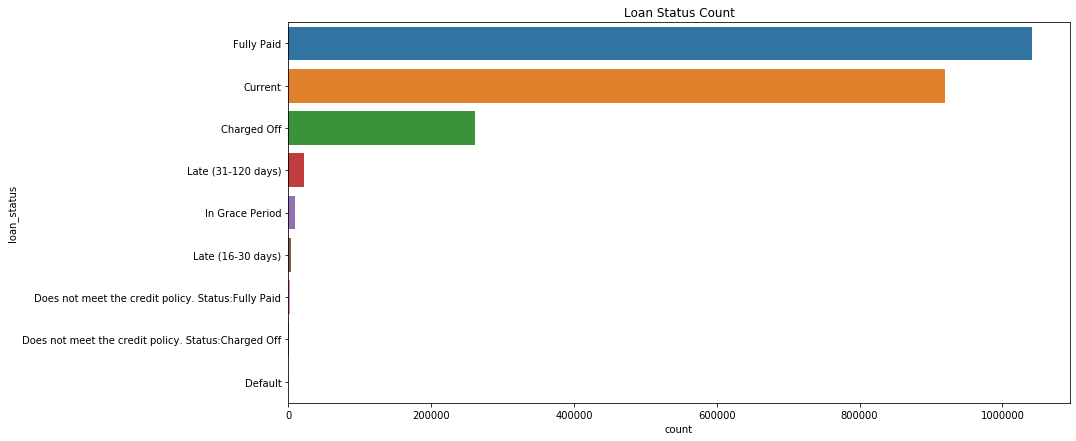

In [23]:
#Lets beging my looking at the loan status. 
plt.figure(figsize = (14,7))
sns.countplot(y = df.loan_status, data = df, order = df.loan_status.value_counts().index)
plt.title("Loan Status Count")
plt.show()


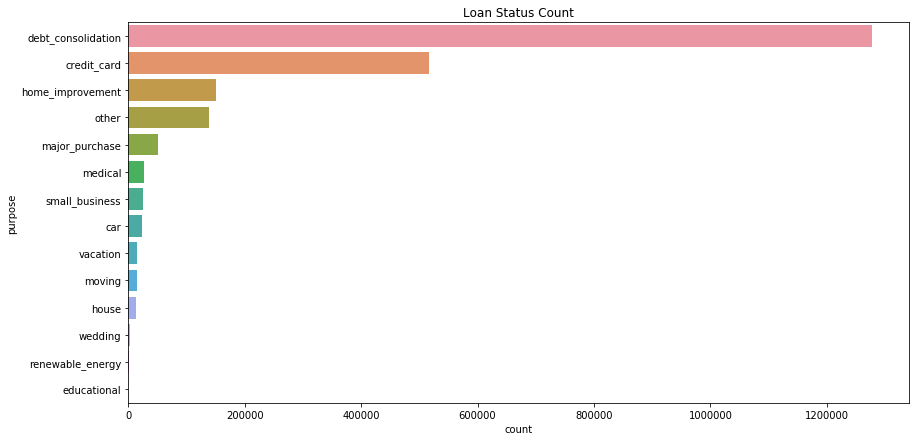

In [24]:
#Let's look at the purpose of these loans
plt.figure(figsize = (14,7))
sns.countplot(y = df.purpose, data = df, order = df.purpose.value_counts().index)
plt.title("Loan Status Count")
plt.show()

**Interesting to Note:** 
* Amazing, that most of the lending club loans were for debt consolidation and credit cards payment. To which I believe these catagories should be combined. 
* It's interesting to see note not much of the loans are for medical use, being this platform is based in the states and the states have high health care costs.

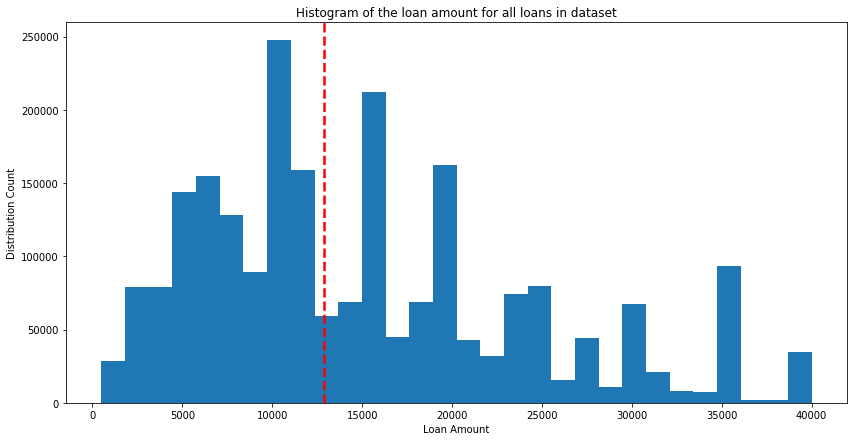

In [39]:
#Let's look at the distribution of loan amounts
plt.figure(figsize = (14,7))
plt.hist(x = df.loan_amnt, bins = 30)
plt.title("Histogram of the loan amount for all loans in dataset")
plt.xlabel("Loan Amount")
plt.ylabel("Distribution Count")
plt.axvline(df.loan_amnt.median(), color='red', linestyle='dashed', linewidth=2.5)
plt.show()

In [30]:
print(f'The biggest loan given on comes to an ammount of ${max(df.loan_amnt)}.')
print(f'The smallest loan given on comes to an ammount of ${min(df.loan_amnt)}.')

The biggest loan given on comes to an ammount of $40000.
The smallest loan given on comes to an ammount of $500.


**Interesting to Note:** 
* It seems as if the loans range from very little as 500*USD* to as much as 40,000*USD*
* The median loan seems to be somewhere around 13,000*USD*
* It is a right skewed distribution

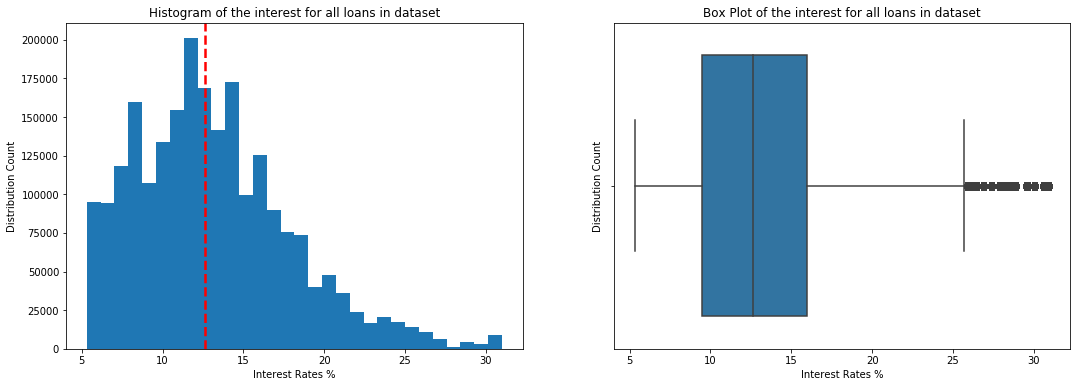

In [50]:
#Let's look at the Interest Rates with a histogram
plt.figure(figsize = (18,6))

#fig 1
plt.subplot(1,2,1)
plt.hist(x = df['int_rate'], bins = 30)
plt.title("Histogram of the interest for all loans in dataset")
plt.xlabel("Interest Rates %")
plt.ylabel("Distribution Count")
plt.axvline(df.int_rate.median(), color='red', linestyle='dashed', linewidth=2.5)

#fig 2
plt.subplot(1,2,2)
sns.boxplot(x = df['int_rate'])
plt.title("Box Plot of the interest for all loans in dataset")
plt.xlabel("Interest Rates %")
plt.ylabel("Distribution Count")

plt.show()

**Interesting to Note:** 
* Wow, can't believe there are interest rates that go up to 30% that is INSANE
* The Interest rates really do vary, however, it seems to be in the normal credit card interest rates range. 

In [14]:
#Lets measure how many loans were created each year. 
# First we need to create a new column year, and transform the issue_date
# feature to year
df['year'] = pd.to_datetime(df.issue_d).dt.year

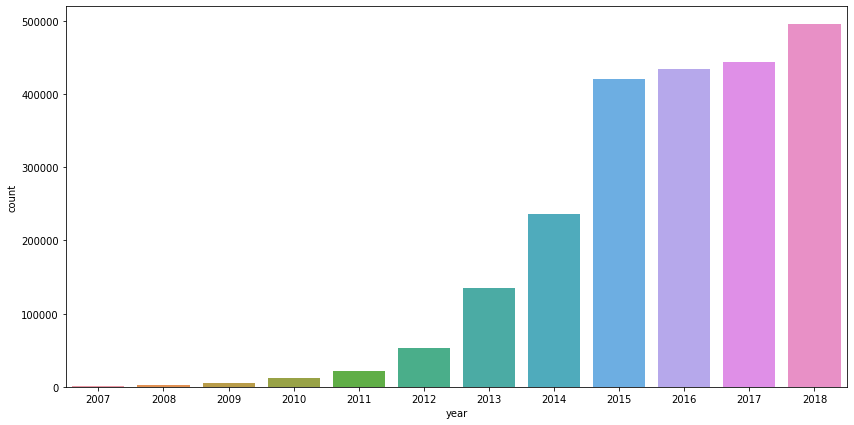

In [15]:
plt.figure(figsize = (14,7))
sns.countplot(x = df.year, data = df)
plt.title("Amount of Loans Given Per Year")
plt.show()